**Xavier de Juan Pulido**

**Lorenzo Andrés Vigo del Rosso**

# Laboratory 1: A review of important concepts in numerical optimization

### Abstract

This laboratory is focused on unconstrained optimization of a function $f(x)$ and, in particular, on understanding some of the basic conditions a minimum has to satisfy. Indeed, a minimum $x^*$ of a function $f(x)$ has to satisfy that $\nabla f(x^*) = 0$ and $\nabla^2f(x^∗)$ is positive definite. What does this mean from a geometrical point of view? Let us analyze this with several examples.

## 1. One dimensional case

We begin with the one dimensional case. Assume that $x \in \mathbb{R}$ and that $f(x) = x^3 − 2x + 2$\
You are asked to follow the next steps:

**1\.** Plot this function within the range $x \in [−2, 2]$, for instance. For that purpose use the matplotlib from Python using the examples included within this [document](https://matplotlib.org/2.0.2/gallery.html).

In [1]:
# We define the given function
def f(x):
    return x**3 - 2*x + 2

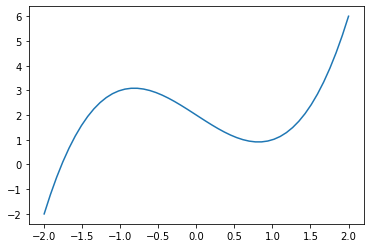

In [2]:
# Importing the required libraries, we plot the function as demanded
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2)
fig = plt.figure()
plt.plot(x, f(x))
plt.show()

**2\.** Compute analytically the points $x^∗$ that satisfy $f'(x) = 0$. Observe if the obtained result is congruent with the plot performed in the previous point.

$f'(x) = 3x^2 - 2$\
$f'(x) = 0 \Rightarrow 3x^2 - 2 = 0 \Rightarrow x^2 = \frac{2}{3} \Rightarrow x = \pm\sqrt{\frac{2}{3}} = \pm 0.816496581$

*Yes, it is congruent. We know that points satisfying $f'(x) = 0$ could be either a maximum or a minimum (if $f''(x) \neq 0$) and we can observe in the plot that there's a maximum between -1.0 and -0.5 and a minimum between 0.5 and 1.0.*

**3\.** We are now going to check which of the latter points $x^*$ are a minimum (or a maximum). For that purpose let us perform a 2nd order Taylor expansion around point $x^*$

$f(x^* + d) \approx f(x^*) + d f'(x^*) + \frac{1}{2} d^2 f''(x^*)$

where $d \in \mathbb{R}$ is the perturbation around $x^*$. Since we are dealing with a one dimensional function, $f''(x^*)$ is a real number which may be positive or negative.

Equation (1) tells us that the function $f(x)$ can be approximated around $x^*$ (with a small value of $d$) using a quadratic function. The value of the second derivative will tell us if the point $x^*$ is a minimum or a maximum.

In order for $x^*$ to be a minimum, you need $f''(x^*)$ to be positive. In other words, you need $f'(x^*)$ to be convex at that point. This can be expressed in another way: you need $d^2 f''(x^*) > 0$ for any $d \neq 0$. The latter sentence is obvious (and may seem stupid) in one dimension but has a high importance in higher dimensions.

**4\.** You may also plot $f''(x)$ for the range $x \in 2 [2, 2]$. If $f''(x)$ is positive the function can be approximated with a convex 2nd order Taylor expansion at x. On the other hand, if $f''(x)$ is
negative the function is said to be concave at that point.

In [3]:
# We define the given function and plot it as we did before
def f_2(x):
    return 6*x

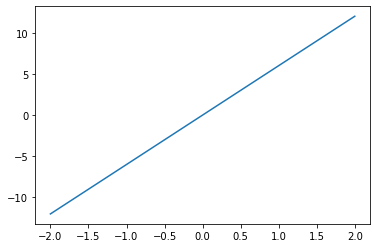

In [4]:
x = np.linspace(-2, 2)
fig = plt.figure()
plt.plot(x, f_2(x))
plt.show()

*We can see that when x is negative, $f''(x)$ is also negative and therefore $f(x)$ is concave. And when x is positive $f''(x)$ is also positive, therefore $f(x)$ is convex*

## 2. Two dimensional case

### 2.1 A simple two-dimensional function

We are now going to focus on simple two-dimensional functions, $x \in \mathbb{R}^2, x = (x_1. x_2)^T$ (vectors are expressed column-wise). Let us begin with the next quadratic expression.

Follow the next steps:

**1\.** Plot this function. It should be noted that this function has a minimum at $(x_1, x_2) = (0, 0)$.

In [7]:
# We define the given function and plot it as we did before
def f(x_1, x_2):
    return x_1**2 + x_2**2

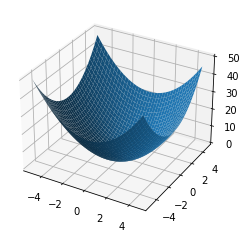

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_1 = np.arange(-5, 5, 0.25)
x_2 = np.arange(-5, 5, 0.25)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = f(x_1, x_2)

surf = ax.plot_surface(x_1, x_2, z)
plt.show()

**2\.** Analytically compute the gradient of the function, $ \nabla f(x) $, and compute the point $x^*$ at which $ \nabla f(x^*) = 0 $.

$\nabla f(x) = \Big(\frac{\delta f(x)}{\delta x_1} \> \frac{\delta f(x)}{\delta x_2}\Big)^T = (2x_1 \> 2x_2)^T$

$\nabla f(x) = 0 \Rightarrow (2x_1 \> 2x_2)^T = (0 \> 0)^T \Rightarrow (x_1 \> x_2)^T = (0 \> 0)^T$

**3\.** Let $d \in \mathbb{R}^2 $ be the perturbation around $x^*$. The Taylor expansion, up to second order, of a function of several variables can be compactly expressed as

$ f(x^* + d) \approx f(x^*) + d^T \nabla f(x^*) + \frac{1}{2} d^T \nabla ^ 2 f(x^*) d $

Analyze the previous expression and be sure to understand the operations that are done at each of the terms.


_The value of $f(x^* + d)$ is a numerical value because:_
- $f(x^*)$ _is the value of the function $f$ evaluated at $x^*$ (vector), which gives out a number._
- $d^T \nabla f(x^*)$ _is the scalar product of two vectors, so it also gives out a number. Note that $d$ is a vector by definition and the gradient of $f$ evaluated at $x^*$ also is._
- $ \nabla ^2 f(x^*) d $ _is a product between the Hessian matrix and vector d, which results in a vector. Then, $d^T$ is multiplied by the obtained vector, resulting in a number._

_The sum of three numbers equals to a number, which makes sense since we are approximating $f(x^* + d)$, which, by definition of $f$, maps a vector $(x^* + d \in \mathbb{R}^2)$ to a value in $\mathbb{R}$._

Compute the Hessian matrix, $\nabla ^2 f(x)$, at the point $x = x^*$. You should obtain $\nabla^2 f(x) = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$

$\nabla^2 f(x) = \begin{pmatrix} \frac{\delta^2 f(x)}{\delta x_1^2} & \frac{\delta^2 f(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$

_The derivates used in this exercise are almost trivial._

The latter matrix is giving us information about the shape of the quadratic approximation at $x = x^*$ in a similar way as has been done for the one dimensional case. For the one-dimensional case it is easy to check if we have a minimum, $f''(x^*) > 0$, or a maximum, $f''(x^*) < 0$. For a higher dimensional problem we are sure that the quadratic approximation is convex and that we have a minimum if

$d^T \nabla ^2 f(x^*) d > 0, d \neq 0 $ (3)

We have a maximum if

$d^T \nabla ^2 f(x^*) d < 0, d \neq 0 $ (4)

The previous conditions can be verified by computing the eigenvalues of $ \nabla ^ 2 f(x^*) $. If all eigenvalues are strictly positive, equation (3) is satisfied. If all eigenvalues are strictly negative,
equation (4) is satisfied. For this example, which are the eigenvalues of the Hessian matrix? Do we have a minimum or a maximum at $x^*$?

_To calculate the eigenvalues, we will find the solutions of the characteristic polynomial of $ \nabla ^ 2 f(x)$:_

$\begin{vmatrix} 2 - \lambda & 0 \\ 0 & 2 - \lambda \end{vmatrix} = 0 \Rightarrow (2 - \lambda)^2 = 0 \Rightarrow \lambda = 2$

*Both eigenvalues are strictly positive so we have a minimum at $(0,0)$*

**4\.** The question that may arise know is: what happens if some eigenvalues are positive and some
negative? What happens if the eigenvalue is zero? For that issue you are asked to analyze the
following functions:

$f_A(x) = -x_1^2 - x_2^2$

$f_B(x) = x_1^2 - x_2^2$

$f_C(x) = x_1^2$

_We will define all of these three functions to use them later in the exercises:_

In [9]:
def f_A(x_1, x_2):
    return - x_1**2 - x_2**2

def f_B(x_1, x_2):
    return x_1**2 - x_2**2

def f_C(x_1, x_2=None):
    return x_1**2

You are recommended to draw the contour plot of the previous functions. Observe the shape
they have. Then answer the following questions:

a) Perform a plot of the function. At which point $x^*$ is the gradient zero?

Function A


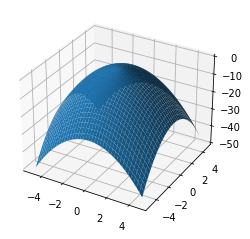

In [10]:
print("Function A")
fig = plt.figure()
ax = plt.axes(projection='3d')
x_1 = np.arange(-5, 5, 0.25)
x_2 = np.arange(-5, 5, 0.25)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = f_A(x_1, x_2)
surf = ax.plot_surface(x_1, x_2, z)
plt.show()

_We can see that the maximum is reached at (0,0). This can be checked analytically:_

$ \nabla f_{A}(x) = (-2x_1, -2x_2) = (0, 0) => x_1 = 0, x_2 = 0 $

Function B


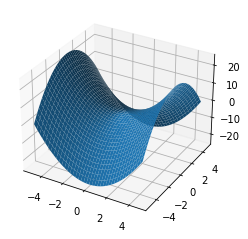

In [11]:
print("Function B")
fig = plt.figure()
ax = plt.axes(projection='3d')
x_1 = np.arange(-5, 5, 0.25)
x_2 = np.arange(-5, 5, 0.25)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = f_B(x_1, x_2)
surf = ax.plot_surface(x_1, x_2, z)
plt.show()

_It can be guessed that the gradient is 0 when $x_1 = x_2 = 0$, but we will check it analytically:_

$ \nabla f_{B}(x) = (2x_1, -2x_2) = (0,0) => x_1 = 0, x_2 = 0 $

Function C


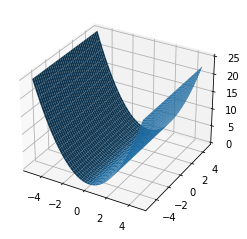

In [12]:
print("Function C")
fig = plt.figure()
ax = plt.axes(projection='3d')
x_1 = np.arange(-5, 5, 0.25)
x_2 = np.arange(-5, 5, 0.25)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = f_C(x_1, x_2)
surf = ax.plot_surface(x_1, x_2, z)
plt.show()

_It can be seen that the gradient is 0 in the whole line where $x_1$, in fact:_

$ \nabla f_C (x) = (2x_1, 0) = (0, 0) => x_1 = 0 $

b) At the points where the gradient is zero, what kind of information is giving us the Hessian
matrix? Is this a minimum? A maximum? None of both? You may use the [eigvals](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html) function of Python to compute the eigenvalues of the Hessian matrix (i.e. there is no need to compute them analytically).

**Function A Hessian**\
$\nabla^2 f_A(x) = \begin{pmatrix} \frac{\delta^2 f_A(x)}{\delta x_1^2} & \frac{\delta^2 f_A(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f_A(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f_A(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} -2 & 0 \\ 0 & -2 \end{pmatrix}$

In [13]:
hess_fa = np.matrix('-2 0; 0 -2')
np.linalg.eigvals(hess_fa)

array([-2., -2.])

_There is only one eigenvalue in $(x_1, x_2) = (0, 0)$, which is negative: this tells us there is a maximum in that point_

**Function B Hessian**\
$\nabla^2 f_B(x) = \begin{pmatrix} \frac{\delta^2 f_B(x)}{\delta x_1^2} & \frac{\delta^2 f_B(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f_B(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f_B(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & -2 \end{pmatrix}$

In [14]:
hess_fb = np.matrix('2 0; 0 -2')
np.linalg.eigvals(hess_fb)

array([ 2., -2.])

_Both eigenvalues in $(x_1, x_2) = (0, 0)$ have opposite eigenvalues: there is no minimum or maximum on this point._

**Function C Hessian**\
$\nabla^2 f_C(x) = \begin{pmatrix} \frac{\delta^2 f_C(x)}{\delta x_1^2} & \frac{\delta^2 f_C(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f_C(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f_C(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix}$

In [15]:
hess_fc = np.matrix('2 0; 0 0')
np.linalg.eigvals(hess_fc)

array([2., 0.])

In a similar way as for the one dimensional case, the eigenvalues of the Hessian $ \nabla ^2 f(x) $ gives
us information about the local shape of the function $f(x)$ at point $x$. This information will
be used by numerical methods to accelerate descent to the optimal point we are looking for!
In this lab we will focus, however, on the optimal points.

### 2.2 A more complex two dimensional function

You are proposed to study the function that has been given in the lectures

$f(x_1, x_2) = x_1^2(4 - 2.1 x^2_1 + \frac{1}{3}x^4_1) + x_1x_2 + x^2_2(-4 + 4x^2_2)$

In [16]:
def f2d(x_1, x_2):
    return x_1**2*(4-2.1*x_1**2 + (1/3)*x_1**4) + x_1*x_2 + x_2**2*(-4+4*x_2**2)

Follow these steps:

**1\.** Plot the previous function within the range $x_1 \in [-2, 2] $ and $x_2 \in [-1, 1]$ using, for instance, step of e.g. 0.1. Be sure that the plot is correct: just look at the plot of the lectures and
compare them with the result you obtain. Observe where the minimums (and maximums) may be. There may be multiple minimums and maximums!

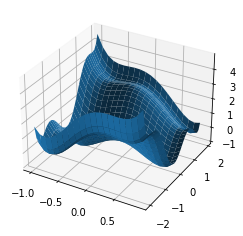

In [17]:
# Define to rotate the axes in the plot (do not use to compute values or gradients)
def f2d_plot(x_1, x_2):
    return (-x_1)**2*(4-2.1*(-x_1)**2 + (1/3)*(-x_1)**4) - x_1*x_2 + x_2**2*(-4+4*x_2**2)

fig = plt.figure()
ax = plt.axes(projection='3d')
x_1 = np.arange(-2, 2, 0.1)
x_2 = np.arange(-1, 1, 0.1)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = f2d_plot(x_1, x_2)
surf = ax.plot_surface(x_2, x_1, z)
plt.show()

_There seems to be a local minimum in each corner of the plot. Also, there is a local maximum close to $(x_1, x_2) = (1, 0)$ and a minimum next to both $(x_1, x_2) = (0, -0.5)$ and $(x_1, x_2) = (0, 0.5)$.
Outside the plot, the function seems to grow towards infinite in both dimensions, so we can not guarantee there are local (or global) maxima there._

**2\.** Analytically compute the gradient $\nabla f(x)$.

$\nabla f(x) = (8x_1 - 8.4 x_1^3 + 2 x_1^5 + x_2,\; x_1 -8x_2 + 16 x_2^3)$

**3\.** Numerically compute an approximation of the points $x^*$ at which $\nabla f(x^*) = 0$. For that issue:

(a) Evaluate $||\nabla f(x)||^2$ at the previous range using a step of e.g. 0.005 or smaller if you prefer (but not too small!). You may create a matrix that stores all the latter values to be able to analyze them in the next steps.

In [19]:
def gradNorm(x_1, x_2):
    return (8*x_1-8.4*x_1**3+2*x_1**5+x_2)**2 + (x_1 - 8*x_2+16*x_2**3)**2

valueMx = np.zeros((int(4/0.005), int(2/0.005)))
for i in range(int(4/0.005)):
    for j in range(int(2/0.005)):
        valueMx[i, j] = gradNorm(-2 + 0.005*i, -1+ 0.005*j) 

valueMx

array([[290.44      , 286.36550724, 282.41597569, ..., 168.87039728,
        170.88970369, 173.01192324],
       [281.25287051, 277.18369845, 273.23946373, ..., 161.16045293,
        163.18503241, 165.31254879],
       [272.43049364, 268.36658803, 264.42759587, ..., 153.79371809,
        155.82351638, 157.95627532],
       ...,
       [153.17515279, 150.93127616, 148.79332839, ..., 252.15638055,
        255.96833402, 259.90213734],
       [160.19493924, 157.95627532, 155.82351638, ..., 260.61047734,
        264.42759587, 268.36658803],
       [167.54594626, 165.31254879, 163.18503241, ..., 269.41712639,
        273.23946373, 277.18369845]])

_We just defined a python function that gives the value of the norm of the gradient. Then, evaluated said function at every 'grid point' defined by the ranges in both axes. Then, in the matrix we saved the values given by said evaluation in a matrix._

(b) Using brute force, search for those points $\hat{x}$ within the previous range at which the value
of $||\nabla f(x)||^2$ is strictly smaller than the value of its 8 neighbors. Our purpose here is
to find the those points at which the gradient is small. We thus find all the “candidate” points that may be a minimum, a maximum or a saddle point!

In [21]:
candidates = []

for i in range(1, valueMx.shape[0] - 2):
    for j in range(1, valueMx.shape[1] - 2):
        value = valueMx[i, j]
        if (value < valueMx[i - 1, j - 1] and value < valueMx[i - 1, j] and value < valueMx[i - 1, j + 1] and value < valueMx[i, j - 1] and value < valueMx[i, j + 1] and value < valueMx[i + 1, j - 1] and value < valueMx[i + 1, j] and value < valueMx[i + 1, j + 1]):
            candidates.append([i, j])

len(candidates)

15

_We obtained 15 candidates. We applied a sliding window technique to find these candidates._

*The candidates and its gradient norm are given by the following cell*

In [34]:
xyCand = []

print("The candidate points are the following:")
for candidate in candidates:
    xyCand.append([-2 + 0.005*candidate[0], -1+ 0.005*candidate[1]])
    print("(%f, %f)" % (-2 + 0.005*candidate[0], -1+ 0.005*candidate[1]))

The candidate points are the following:
(-1.705000, 0.795000)
(-1.640000, -0.230000)
(-1.605000, -0.570000)
(-1.295000, -0.605000)
(-1.230000, -0.160000)
(-1.110000, 0.770000)
(-0.090000, 0.715000)
(0.000000, 0.000000)
(0.090000, -0.715000)
(1.110000, -0.770000)
(1.230000, 0.160000)
(1.295000, 0.605000)
(1.605000, 0.570000)
(1.640000, 0.230000)
(1.705000, -0.795000)


(c) Which are the values of $\hat{x}$ you have obtained? Which is the value of $|| \nabla f(x) ||^2 $ at those
points?

In [35]:
gradValues = []
print("Gradient value for each candidate (preserving the candidate order used above):")
for candidate in candidates:
    gradValues.append(valueMx[candidate[0], candidate[1]])
    print(valueMx[candidate[0], candidate[1]])

Gradient value for each candidate (preserving the candidate order used above):
0.001430167896082404
0.0006745825305651661
0.0004156534940958011
4.54050363337881e-05
0.00024181811612489877
0.0012559284739345159
0.001476871473448917
0.0
0.0014768714734487802
0.0012559284739345159
0.0002418181161249222
4.54050363337881e-05
0.0004156534940958011
0.0006745825305651661
0.001430167896082404


_It seems like a good approximation as all the gradient values are close to 0._

**4\.** Analytically compute the Hessian of $f(x_1, x_2)$ and evaluate it at the values $\hat{x}$ you have found. What kind of information is giving you the Hessian? Does it correspond to a minimum (the Hessian is positive definite)? To a maximum (the Hessian is negative definite)? Or may be a saddle point? You may use the eigvals function of Python to compute the eigenvalues of the Hessian matrix (i.e. there is no need to compute them analytically). Take into account that there may be several minimums, maximums and saddle points for the function you are analyzing.

$\nabla^2 f(x) = \begin{pmatrix} \frac{\delta^2 f(x)}{\delta x_1^2} & \frac{\delta^2 f(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 8 - 25.2 x_1^2 + 10 x_1^4 & 1 \\ 1 & -8 + 48 x_2^2 \end{pmatrix}$

In [37]:
# Here we define the hessian matrix
def hess2d(x_1, x_2):
    hess = np.matrix('0 1; 1 0')
    hess[0, 0] = 8-25.2*x_1**2+10*x_1**4
    hess[1, 1] = -8 + 48*x_2**2
    return hess

In [38]:
# Here we check which kind of point we have (large explanation at the end)
lminimum, lmaximum, saddlepoint, undefined, maybelmin, maybelmax = 0, 0, 0, 0, 0, 0
for coords in xyCand:
    print(hess2d(coords[0], coords[1]))
    eigvals = np.linalg.eigvals(hess2d(coords[0], coords[1]))
    print(eigvals)

    if (eigvals[0] * eigvals[1] < 0):
        print('This candidate is a saddle point.')
        saddlepoint += 1
    elif (np.all(eigvals < 0)):
        print('This candidate is a local maximum.')
        lmaximum += 1
    elif (np.all(eigvals > 0)):
        print('This candidate is a local minimum')
        lminimum += 1
    else: # difficult to define what these candidates are
        if (np.all(eigvals == 0)):
            print("undefined")
            undefined += 1
        elif (np.any(eigvals < 0)):
            print('This candidate might be a local maximum.')
            maybelmax += 1
        elif (np.any(eigvals > 0)):
            print('This candidate might be a local minimum.')
            maybelmin += 1
    print('\n')

print("number of local minima", lminimum)
print("number of local maxima", lmaximum)
print("number of saddlepoint", saddlepoint)
print("other kinds of points", undefined + maybelmin + maybelmax)

[[19  1]
 [ 1 22]]
[18.69722436 22.30277564]
This candidate is a local minimum


[[12  1]
 [ 1 -5]]
[12.05862138 -5.05862138]
This candidate is a saddle point.


[[9 1]
 [1 7]]
[9.41421356 6.58578644]
This candidate is a local minimum


[[-6  1]
 [ 1  9]]
[-6.06637298  9.06637298]
This candidate is a saddle point.


[[-7  1]
 [ 1 -6]]
[-7.61803399 -5.38196601]
This candidate is a local maximum.


[[-7  1]
 [ 1 20]]
[-7.03698637 20.03698637]
This candidate is a saddle point.


[[ 7  1]
 [ 1 16]]
[ 6.89022777 16.10977223]
This candidate is a local minimum


[[ 8  1]
 [ 1 -8]]
[ 8.06225775 -8.06225775]
This candidate is a saddle point.


[[ 7  1]
 [ 1 16]]
[ 6.89022777 16.10977223]
This candidate is a local minimum


[[-7  1]
 [ 1 20]]
[-7.03698637 20.03698637]
This candidate is a saddle point.


[[-7  1]
 [ 1 -6]]
[-7.61803399 -5.38196601]
This candidate is a local maximum.


[[-6  1]
 [ 1  9]]
[-6.06637298  9.06637298]
This candidate is a saddle point.


[[9 1]
 [1 7]]
[9.41421356 6.585

_The previous cell evaluates the hessian matrix for each of the candidate points we have found and computes the eigenvalues from the Hessian. Then we consider 4 options shown on the if block:_
1. _1 eigenvalue positive and one negative (the product is negative) => the point is a saddle point_
2. _Both eigenvalues negative => the point is a maximum_
3. _Both eigenvalues positive => the point is a minimum_
4. _Otherwise, it is difficult to say which kind of point we have with the current information_